# Univariate Linear Regression from scratch with gradient descent

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [147]:
w = 10 * np.random.rand() - 5
b = 30 * np.random.rand() - 15

In [148]:
x_train = 20 * np.random.rand(100) - 10
y_train = w * x_train + b + (20 * np.random.rand(100) - 10)

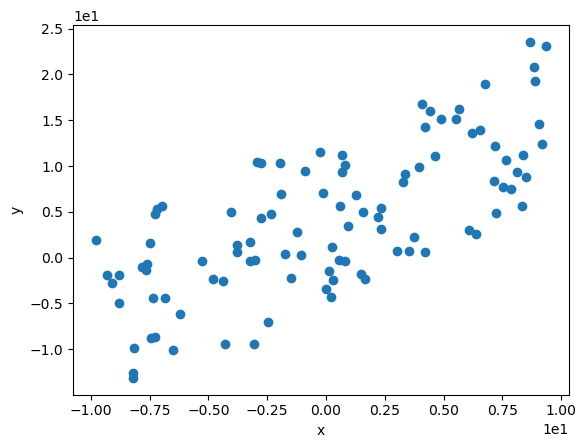

In [149]:
plt.scatter(x_train, y_train)
# give name to the axis
plt.xlabel('x')
plt.ylabel('y')
# divide axis value by 10 and show 1e2 instead of 100
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.show()

In [150]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    
    total_cost = cost / (2 * m)
    return total_cost

In [151]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = dj_db = 0.0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
        
    dj_dw, dj_db = dj_dw / m, dj_db / m

    return dj_dw, dj_db

In [152]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.5e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    
    return w, b, J_history, p_history

In [153]:
w_init, b_init = 0, 0
iterations = 10000
alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.11865e+01  dj_dw: -3.236e+01, dj_db: -4.171e+00   w:  3.236e-01, b: 4.17145e-02
Iteration 1000: Cost 1.51114e+01  dj_dw:  6.298e-07, dj_db: -1.758e-04   w:  1.027e+00, b: 4.06057e+00
Iteration 2000: Cost 1.51114e+01  dj_dw:  2.729e-11, dj_db: -7.618e-09   w:  1.027e+00, b: 4.06075e+00
Iteration 3000: Cost 1.51114e+01  dj_dw:  9.046e-15, dj_db: -3.315e-13   w:  1.027e+00, b: 4.06075e+00
Iteration 4000: Cost 1.51114e+01  dj_dw:  5.602e-15, dj_db: -4.402e-14   w:  1.027e+00, b: 4.06075e+00
Iteration 5000: Cost 1.51114e+01  dj_dw:  5.602e-15, dj_db: -4.402e-14   w:  1.027e+00, b: 4.06075e+00
Iteration 6000: Cost 1.51114e+01  dj_dw:  5.602e-15, dj_db: -4.402e-14   w:  1.027e+00, b: 4.06075e+00
Iteration 7000: Cost 1.51114e+01  dj_dw:  5.602e-15, dj_db: -4.402e-14   w:  1.027e+00, b: 4.06075e+00
Iteration 8000: Cost 1.51114e+01  dj_dw:  5.602e-15, dj_db: -4.402e-14   w:  1.027e+00, b: 4.06075e+00
Iteration 9000: Cost 1.51114e+01  dj_dw:  5.602e-15, dj_db: -4.402e-14   

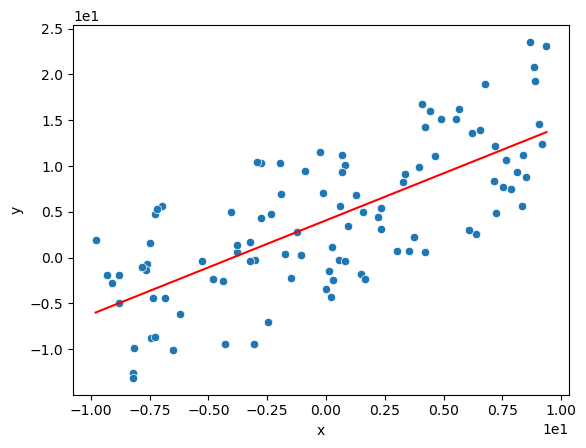

In [154]:
y_predicted = w_final*x_train+b_final
sns.scatterplot(x=x_train, y=y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
sns.lineplot(x=x_train, y=y_predicted, color='red')
plt.show()

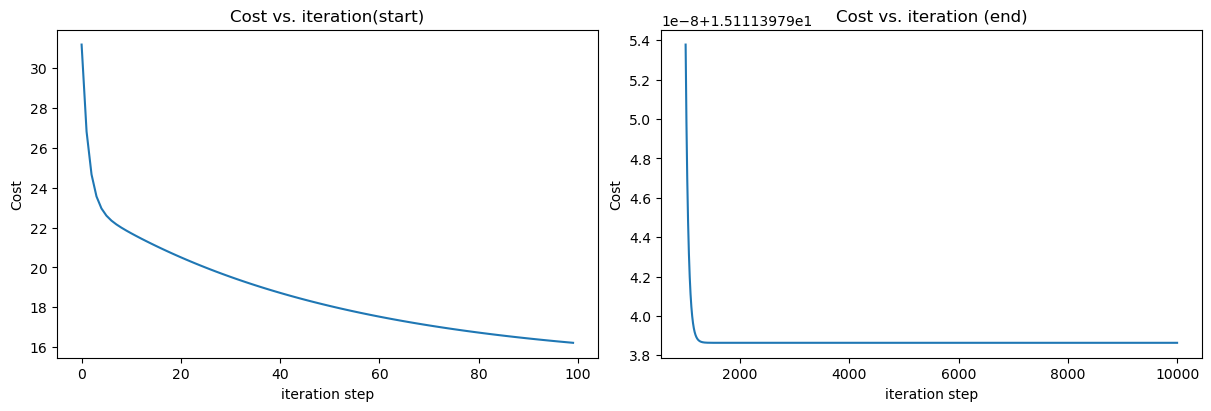

In [155]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

In [156]:
print(f"Actual w: {w:0.2f}, \tPredicted w: {w_final:0.2f}")
print(f"Actual b: {b:0.2f}, \tPredicted b: {b_final:0.2f}")
mse = np.sum((np.dot(x_train, w_final) + b_final - y_train) ** 2) / len(y_train)
print(f"Mean squared error: {mse:0.2f}")
mae = np.sum(np.abs(np.dot(x_train, w_final) + b_final - y_train)) / len(y_train)
print(f"Mean absolute error: {mae:0.2f}")

Actual w: 1.20, 	Predicted w: 1.03
Actual b: 4.14, 	Predicted b: 4.06
Mean squared error: 30.22
Mean absolute error: 4.69


# Univariate Linear Regression from scratch with ordinary least squares method

In [157]:
class SimpleLinearRegression:
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X) * np.mean(y) - np.mean(X*y)) / ((np.mean(X)**2) - np.mean(X**2)))
        self.b = np.mean(y) - self.m * np.mean(X)
    
    def coeffs(self):
        return self.m, self.b
    
    def predict(self):
        self.y_pred = self.m * self.X + self.b
        return self.y_pred
    
    def r_squared(self):
        self.y_mean = np.full((len(self.y)), np.mean(self.y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))

In [158]:
linear_model = SimpleLinearRegression()
linear_model.fit(x_train, y_train)
w_linear = linear_model.coeffs()[0]
b_linear = linear_model.coeffs()[1]
print(f"Actual w: {w:0.2f},  \tPredicted w: {w_linear:0.2f}")
print(f"Actual b: {b:0.2f},  \tPredicted b: {b_linear:0.2f}")
mse = np.sum((np.dot(x_train, w_linear) + b_linear - y_train) ** 2) / len(y_train)
print(f"Mean squared error: {mse:0.2f}")
mae = np.sum(np.abs(np.dot(x_train, w_linear) + b_linear - y_train)) / len(y_train)
print(f"Mean absolute error: {mae:0.2f}")

Actual w: 1.20,  	Predicted w: 1.03
Actual b: 4.14,  	Predicted b: 4.06
Mean squared error: 30.22
Mean absolute error: 4.69


# Univariate Linear Regression with Sklearn

In [159]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [160]:
linear_model = LinearRegression()
linear_model.fit(x_train.reshape(-1, 1), y_train)
w_linear = linear_model.coef_[0]
b_linear = linear_model.intercept_
print(f"Actual w: {w:0.2f},  \tPredicted w: {w_linear:0.2f}")
print(f"Actual b: {b:0.2f},  \tPredicted b: {b_linear:0.2f}")
mse = mean_squared_error(y_train, linear_model.predict(x_train.reshape(-1, 1)))
print(f"Mean squared error: {mse:0.2f}")
mae = mean_absolute_error(y_train, linear_model.predict(x_train.reshape(-1, 1)))
print(f"Mean absolute error: {mae:0.2f}")


Actual w: 1.20,  	Predicted w: 1.03
Actual b: 4.14,  	Predicted b: 4.06
Mean squared error: 30.22
Mean absolute error: 4.69


In [161]:
linear_model = SGDRegressor(alpha=1.0e-2, max_iter=10000)
linear_model.fit(x_train.reshape(-1, 1), y_train)
w_linear = linear_model.coef_[0]
b_linear = linear_model.intercept_[0]
print(f"Actual w: {w:0.2f},  \tPredicted w: {w_linear:0.2f}")
print(f"Actual b: {b:0.2f},  \tPredicted b: {b_linear:0.2f}")
mse = mean_squared_error(y_train, linear_model.predict(x_train.reshape(-1, 1)))
print(f"Mean squared error: {mse:0.2f}")
mae = mean_absolute_error(y_train, linear_model.predict(x_train.reshape(-1, 1)))
print(f"Mean absolute error: {mae:0.2f}")

Actual w: 1.20,  	Predicted w: 1.19
Actual b: 4.14,  	Predicted b: 3.70
Mean squared error: 31.14
Mean absolute error: 4.77
